# DTSC 5301 Final Report

## Authors
* Bhavana Jonnalagadda
* Patrick Connelly
* Grace Cooper
* Carl Klein
* Piya (Leo) Ngamkam
* Dhairya Veera

> IMPORTANT!! Whatever code block you add, please add a comment with your initials on top so we know who did it e.g. `## PC` or `## BJ`

## Introduction

Our group is performing a study on computer vision, focused on a comparison of facial recognition models, for the final project in STAT-5000.  Pursuant to the study, the team sought out multiple datasets on which we could evaluate the performance of two selected recognition models (Facebook's DeepFace and so-and-so's Fair Face mdoels )to generate performance data and perform statistical analysis on their ability to accurately identify race, age, and gender of a subject in a photograph.

Collectively, we landed on the UTK dataset to perform our evaluation: https://susanqq.github.io/UTKFace/  [(1)](#r1)

The UTK dataset is divided into three parts (1,2, and 3).  The purpose of this project is to execute a preliminary overview of the UTK dataset and perform some rudimentary statistical thereon to determine whether we should evaluate our selected recognition models:

* on a sample of the UTK dataset
* on a specific "chunk" of the UTK dataset (i.e. part 1, part 2, or part 3)
* a combination of chunks from the UTK dataset
* the entirety of the UTK dataset

The outcome of this work is to select the best data combination from the UTK datset to simultaneously: 
* deliver a statistically sound analysis of the Fair Face and DeepFace recognition 
* reduce the amount of processing time and computational power required to generate data for the analysis


## Dataset Source and Description

(Description / overview section)

## Possible Sources of Bias

- Accuracy of self-reported age, race, and gender for each submitted image

- Dataset excludes consideration of non-binary genders; submission may include mix subjects by birth-assigned gender and subjects by current gender identity. 

- Un-accounted for racial sub-diversity (i.e. "Latino / Hispanic" vs "Central American", "South American", "Spanish", "Portuguese")

- Excludes subjects in population that are unwilling to submit or provide their age, race, gender, and photograph

## Data Aggregate Summaries

The below code is present for review, but commented out, as it was required to be executed on a local machine vs. pulling and generating directly from the source.  Each chunk of the UTK dataset ranges from X MB to 500+MB per chunk.  It would be computationally expensive for one seeking to reproduce our results to download the totality of these image files, and the UTK dataset itself did not provide a CSV containing the data of all subject images within it.  

We downloaded and decompressed these chunks, and used the below code to iterate through the decompressed directories to get the names of every file.  Data about each image (specifically, the age, race, and gender of each subject) is encoded in the filename as follows:

[age]_[gender]_[race]_[timestamp]

Where: 

- age is an integer

- Gender is 0 for male and 1 for female

- Race: 0='', 1='', 2='', 3='', 4=''

- Timestamp is in the format YYYYMMDDUTCtime

Our team produced 3 CSVs (UTKpart1, UTKpart2, and UTKpart3.csv) on a local machine, using the below code:

In [ ]:
## PC

# ##### get the raw file names and their standarized encoding to be human-readable 
# ##### and to generate CSVs for upload to our GitHub

# import pandas as pd, numpy as np

# def parse_to_readable(in_path,out_file):
#     all_jpg = [file t
#             for path, subdir, files in os.walk(in_path)
#             for file in glob(os.path.join(path,'*.jpg'))]
#     in_df = pd.DataFrame({'jpgs': all_jpg})
#     in_df['file']=(in_df['jpgs'].str.split('\\')).str[-1]
#     in_df=in_df.drop(labels=['jpgs'],axis=1)
#     in_df[['src_age','src_gender','src_race','src_timestamp']] = in_df['file'].str.split("_",expand=True)
#     # specify conditions for integer value to text race
#     race_int = [in_df['src_race']=='0',in_df['src_race']=='1',in_df['src_race']=='2',in_df['src_race']=='3',in_df['src_race']=='4']
#     race_str = ['White','Black','Asian','Indian','Other']
#     #specify conditions for integer value to text gender
#     gen_int=[in_df['src_gender']=='0',in_df['src_gender']=='1']
#     gen_str=['Male','Female']
#     #add race and gender columns given specified conditions above 
#     in_df['src_race']=np.select(race_int,race_str)
#     in_df['src_gender']=np.select(gen_int,gen_str)
#     in_df['src_age'] = in_df['src_age'].str.split('/').str[-1]
#     in_df['src_timestamp'] = in_df['src_timestamp'].str.split('.').str[0]
#     in_df.to_csv(out_file)

# parse_to_readable("C:\\Users\\[user]\\OneDrive\\Desktop\\AFAD-Full\\part1","C:\\Users\\[user]\\OneDrive\\Desktop\\AFAD-Full\\part1.csv")
# parse_to_readable("C:\\Users\\[user]\\OneDrive\\Desktop\\AFAD-Full\\part2","C:\\Users\\[user]\\OneDrive\\Desktop\\AFAD-Full\\part2.csv")
# parse_to_readable("C:\\Users\\[user]\\OneDrive\\Desktop\\AFAD-Full\\part3","C:\\Users\\[user]\\OneDrive\\Desktop\\AFAD-Full\\part3.csv")

'\ndef parse_to_readable(in_path,out_file):\n    all_jpg = [file \n            for path, subdir, files in os.walk(in_path)\n            for file in glob(os.path.join(path,\'*.jpg\'))]\n    in_df = pd.DataFrame({\'jpgs\': all_jpg})\n    in_df[\'file\']=(in_df[\'jpgs\'].str.split(\'\\\')).str[-1]\n    in_df=in_df.drop(labels=[\'jpgs\'],axis=1)\n    in_df[[\'src_age\',\'src_gender\',\'src_race\',\'src_timestamp\']] = in_df[\'file\'].str.split("_",expand=True)\n    race_int = [in_df[\'src_race\']==\'0\',in_df[\'src_race\']==\'1\',in_df[\'src_race\']==\'2\',in_df[\'src_race\']==\'3\',in_df[\'src_race\']==\'4\']\n    race_str = [\'White\',\'Black\',\'Asian\',\'Indian\',\'Other\']\n    gen_int=[in_df[\'src_gender\']==\'0\',in_df[\'src_gender\']==\'1\']\n    gen_str=[\'Male\',\'Female\']\n    in_df[\'src_race\']=np.select(race_int,race_str)\n    in_df[\'src_gender\']=np.select(gen_int,gen_str)\n    in_df[\'src_age\'] = in_df[\'src_age\'].str.split(\'/\').str[-1]\n    in_df[\'src_timestamp\'] =

Generating these three CSVs and posting them to GitHub enabled our team to clean, format, and combine the data to generate summary statistics for the dataset

NOTE: Our selected models for the STAT-5000 project have differing methods for predicting age.  Fair Face predicts age as a categorical variable in a specified range of ages (e.g. "10-19", "20-29", etc), whereas DeepFace predicts a specific numerical age.  To support our efforts in the STAT-5000 project, we append a column of src_age_grp to the source data to fit the information into the same groups as will be output by Fair Face.  We also intend to perform the same operation on the output of DeepFace age predictions, such that both models can be compared on a categorical variable back to the source data.

In [12]:
# Imports
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Settings for plot rendering, makes work with HTML output + jupyer lab + static output
# pio.renderers.default = "notebook+plotly_mimetype"
# PNG doesn't work unless kaleido package is installed, which has to be manually done through the terminal
pio.renderers.default = "notebook+plotly_mimetype+png"

%matplotlib inline

In [2]:
## PC

#code to import the datasets from GitHub, and do some initial transformations and cleaning

#importing the csvs for the UTK dataset from our GitHub
chunk1_df = pd.read_csv("https://raw.githubusercontent.com/CUBoulder-DS/5301-5000-Final-Report/main/data/UTK/UTKpart1.csv")
chunk2_df = pd.read_csv("https://raw.githubusercontent.com/CUBoulder-DS/5301-5000-Final-Report/main/data/UTK/UTKpart2.csv")
chunk3_df = pd.read_csv("https://raw.githubusercontent.com/CUBoulder-DS/5301-5000-Final-Report/main/data/UTK/UTKpart3.csv")

#creating a new categorical age range column, starting off blank
chunk1_df['src_age_grp']=""
chunk2_df['src_age_grp']=""
chunk3_df['src_age_grp']=""

#######NOTE: below code can be re-used / modified to run on DeepFace evaluation output to place its prediction in the same cateogries as Fair Face#######

#function to check for ages in a given range and to assign a categorical variable
#if the age is between the provided start/stop (inclusive), then the categorical column is assigned the string "start-stop"
def bin_age(in_df,age_column,new_column_name,start,stop):
    in_df[new_column_name]=np.where(in_df[age_column].between(start,stop,inclusive="both"),""+str(start)+"-"+str(stop),in_df[new_column_name])
    return in_df

#iterate through the valid age ranges for what is valid output from FairFace
age_ranges = [(0,2),(3,9),(10,19),(20,29),(30,39),(40,49),(50,59),(60,69),(70,130)]
#place all ages into their appropriate bins using the bin_age function
for age_group in age_ranges:
    chunk1_df=bin_age(chunk1_df,'src_age','src_age_grp',age_group[0],age_group[1])
    chunk2_df=bin_age(chunk2_df,'src_age','src_age_grp',age_group[0],age_group[1])
    chunk3_df=bin_age(chunk3_df,'src_age','src_age_grp',age_group[0],age_group[1])

all_chunks = pd.concat([chunk1_df,chunk2_df,chunk3_df], ignore_index=True)
#all_chunks
#chunk1_df['src_age_grp']=np.where(chunk1_df['src_age'].between(10,19),"10-19","")
chunk3_df


,Unnamed: 0,file,src_age,src_gender,src_race,src_timestamp,src_age_grp
0,0,100_1_0_20170119212053665.jpg,100,Female,White,20170119212053665,70-130
1,1,10_0_0_20170116201102149.jpg,10,Male,White,20170116201102149,10-19
2,2,10_0_0_20170120220628194.jpg,10,Male,White,20170120220628194,10-19
3,3,10_0_1_20170116225209209.jpg,10,Male,Black,20170116225209209,10-19
4,4,10_1_1_20170116225209209.jpg,10,Female,Black,20170116225209209,10-19
...,...,...,...,...,...,...,...
3245,3245,99_1_0_20170120134718759.jpg,99,Female,White,20170120134718759,70-130
3246,3246,99_1_0_20170120221920654.jpg,99,Female,White,20170120221920654,70-130
3247,3247,99_1_1_20170120134639935.jpg,99,Female,Black,20170120134639935,70-130
3248,3248,9_0_0_20170120133313910.jpg,9,Male,White,20170120133313910,3-9


In [19]:
## BJ
# Read in the labels dataset and clean/normalize

# Read in from local csvs
options = dict(index_col=0, dtype={"src_gender": "category", "src_race": "category"})
df_utk_1 = pd.read_csv("data/UTK/UTKpart1.csv", **options)
df_utk_2 = pd.read_csv("data/UTK/UTKpart2.csv", **options)
df_utk_3 = pd.read_csv("data/UTK/UTKpart3.csv", **options)

bins = [0, 3, 10, 20, 30, 40, 50, 60, 70, np.inf]
group_names = ["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-130"]

for df in [df_utk_1, df_utk_2, df_utk_3]:
    # Create bins for the age ranges
    df["src_age_grp"] = pd.cut(df['src_age'], bins, right=False, labels=group_names)
    # Convert timestamp to python pandas native timestamp
    df["src_timestamp"] = pd.to_datetime(df["src_timestamp"], format="%Y%m%d%H%M%S%f")
    # Remove rows with invalid data
    df.drop(df[(df["src_gender"] == "0") | (df["src_race"] == "0")].index, inplace=True)
    # Re-categorize the categories since the invalid "0" was removed
    df["src_gender"].cat.remove_unused_categories(inplace=True)
    df["src_race"].cat.remove_unused_categories(inplace=True)


# Unified df
df_utk = pd.concat([df_utk_1, df_utk_2, df_utk_3], ignore_index=True)
# Convert object columns to categories again, as concatenation across categories doesn't work
df_utk[["src_gender", "src_race"]] = df_utk[["src_gender", "src_race"]].astype("category")
df_utk

/shared-libs/python3.10/py/lib/python3.10/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning:

The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.



,file,src_age,src_gender,src_race,src_timestamp,src_age_grp
0,100_1_0_20170110183726390.jpg,100,Female,White,2017-01-10 18:37:26.392,70-130
1,100_1_2_20170105174847679.jpg,100,Female,Asian,2017-01-05 17:48:47.680,70-130
2,100_1_2_20170110182836729.jpg,100,Female,Asian,2017-01-10 18:28:36.728,70-130
3,101_1_2_20170105174739309.jpg,101,Female,Asian,2017-01-05 17:47:39.308,70-130
4,10_0_0_20161220222308131.jpg,10,Male,White,2016-12-20 22:23:08.132,10-19
...,...,...,...,...,...,...
24097,99_1_0_20170120134718759.jpg,99,Female,White,2017-01-20 13:47:18.759,70-130
24098,99_1_0_20170120221920654.jpg,99,Female,White,2017-01-20 22:19:20.654,70-130
24099,99_1_1_20170120134639935.jpg,99,Female,Black,2017-01-20 13:46:39.935,70-130
24100,9_0_0_20170120133313910.jpg,9,Male,White,2017-01-20 13:33:13.910,3-9


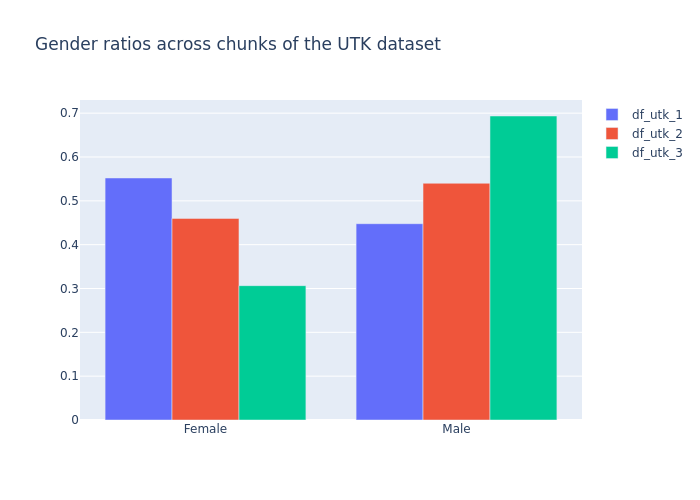

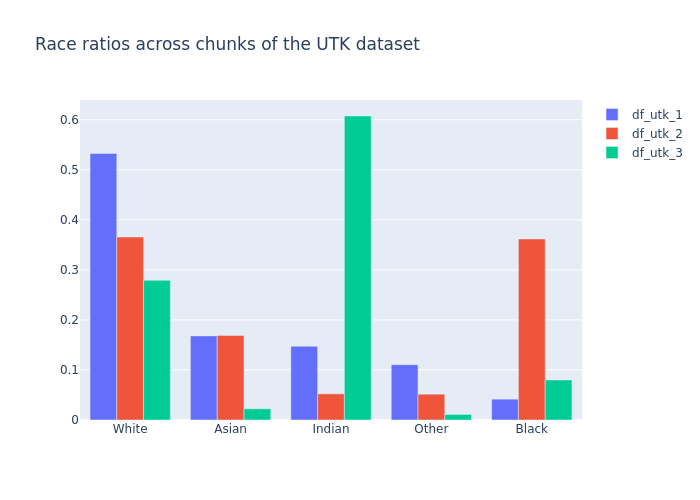

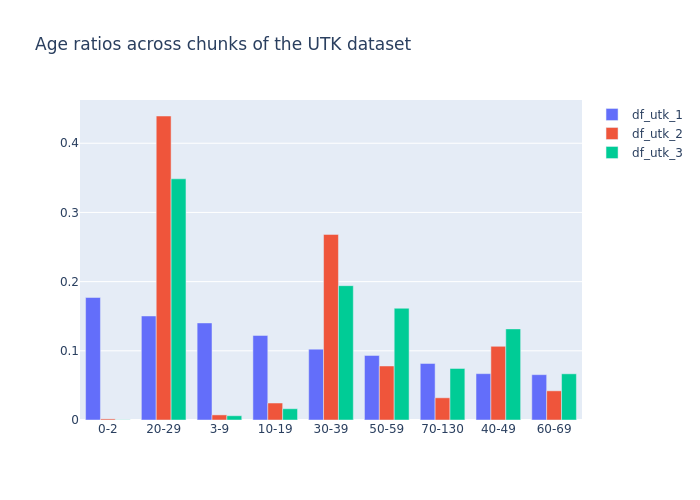

In [21]:
## BJ
# Plot the distributions of age/gender/race across the different chunks

fig = go.Figure()
for i, df in enumerate([df_utk_1, df_utk_2, df_utk_3]):
    fig.add_trace(go.Bar(x=list(df["src_gender"].value_counts().index), y=list(df["src_gender"].value_counts(normalize=True)), name='df_utk_'+str(i+1)))
fig.update_layout(barmode='group', title_text="Gender ratios across chunks of the UTK dataset")
fig.show()


fig = go.Figure()
for i, df in enumerate([df_utk_1, df_utk_2, df_utk_3]):
    fig.add_trace(go.Bar(x=list(df["src_race"].value_counts().index), y=list(df["src_race"].value_counts(normalize=True)), name='df_utk_'+str(i+1)))
fig.update_layout(barmode='group', title_text="Race ratios across chunks of the UTK dataset")
fig.show()

fig = go.Figure()
for i, df in enumerate([df_utk_1, df_utk_2, df_utk_3]):
    fig.add_trace(go.Bar(x=list(df["src_age_grp"].value_counts().index), y=list(df["src_age_grp"].value_counts(normalize=True)), name='df_utk_'+str(i+1)))
fig.update_layout(barmode='group', title_text="Age ratios across chunks of the UTK dataset")
fig.show()


In [ ]:
list(df_utk["src_gender"].cat.categories)
list(df_utk["src_gender"].value_counts())

[12581, 11521]

In [ ]:
## PC

#example code for looking chunk-by-chunk at vectorized groups (i.e. combination of gender-age-race comprises x% of dataset)
#chunk1_df.value_counts(subset=['src_gender','src_race','src_age_grp'],normalize=True).to_frame()
#chunk2_df.value_counts(subset=['src_gender','src_race','src_age_grp'],normalize=True).to_frame()
#chunk3_df.value_counts(subset=['src_gender','src_race','src_age_grp'],normalize=True).to_frame()
#all_chunks.value_counts(subset=['src_gender','src_race','src_age_grp'],normalize=True).to_frame()

0
src_gender src_race src_age_grp          
Female     White    10-19        0.045280
Male       Asian    0-2          0.043899
           White    50-59        0.043701
Female     White    3-9          0.037980
Male       White    10-19        0.037684
...                                   ...
Female     Other    60-69        0.000296
                    70-130       0.000296
Male       Other    70-130       0.000197
Female     0        60-69        0.000099
0          0        60-69        0.000099

[92 rows x 1 columns]

<AxesSubplot: ylabel='src_gender'>

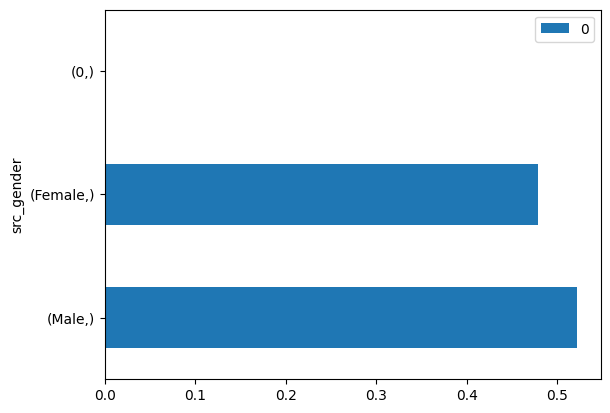

In [ ]:
## PC

#relative frequency of gender for the entire dataset
#not sure why, currently, it is returning row(s?) where there is no gender - we probably need to fix this.

# Note: all plots need titles, definitive legends, etc.
#Grace Cooper mentioned a desire to potentially chunk these into pie charts.
(
    all_chunks
        .value_counts(subset=['src_gender'],normalize=True)
        .to_frame()
        .plot(
            kind='barh'
        )
)

In [ ]:
## PC

#relative frequency of age group for the entire dataset
(
    all_chunks
        .value_counts(subset=['src_age_grp'],normalize=True)
        .to_frame()
        .plot(
            kind='barh'
        )
)

ValueError: pie requires either y column or 'subplots=True'

<AxesSubplot: ylabel='src_race'>

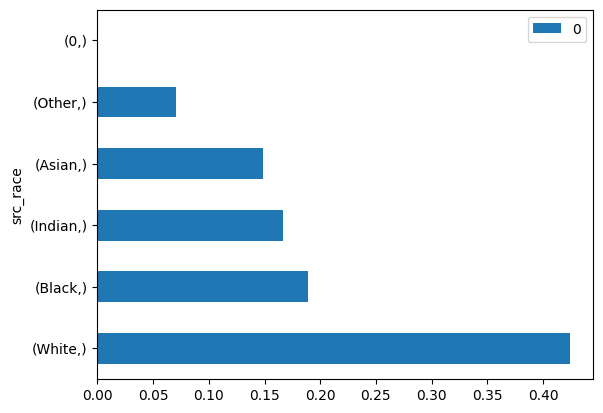

In [ ]:
## PC

#relative frequency of race for the entire dataset
(
    all_chunks
        .value_counts(subset=['src_race'],normalize=True)
        .to_frame()
        .plot(
            kind='barh'
        )
)

## 

## Analysis:  What is our best subset?

The ideal data subset should meet the following criteria:

- Represent each categorized racial group

- Have subject images from each available age group

- Contain a near even distribution of available genders (i.e. 50/50 split)

- Take no more than 5 hours of computational time to evaluate per recognition model

Are these criteria sound?  What other criteria should we have?

NOTE: an alternative analysis could just be doing some conditional probability a-la

P(Race="Asian"|Age Group="20-29"), P(Age Group="50-59"|Gender="Male")...etc.

Speaking with Dr. Yarosh - the conditional probability will be sufficient for the needs of our report, as the conditional probabilities may assist us in answering questions for our STAT 5000 project.

## References / Citations

~~We'll need to use the instructions here:  https://jupyterbook.org/en/stable/tutorials/references.html to build up our bibliography/reference table~~
That only works for Jupyter Books. We are just generating a single ipynb HTML file. To do references, add a `<a name="r5"></a>` before the reference in the below list and to reference it, do `[(5)](#r5)`. [See here](https://stackoverflow.com/questions/5319754/cross-reference-named-anchor-in-markdown)

1. <a name="r1" id="r1"></a>  [@inproceedings{zhifei2017cvpr,
  title={Age Progression/Regression by Conditional Adversarial Autoencoder},
  author={Zhang, Zhifei, Song, Yang, and Qi, Hairong},
  booktitle={IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
  year={2017},
  organization={IEEE}
}// UTKFace

2. <a name="r2"></a> @inproceedings{karkkainenfairface,
  title={FairFace: Face Attribute Dataset for Balanced Race, Gender, and Age for Bias Measurement and Mitigation},
  author={Karkkainen, Kimmo and Joo, Jungseock},
  booktitle={Proceedings of the IEEE/CVF Winter Conference on Applications of Computer Vision},
  year={2021},
  pages={1548--1558}
}// FairFace

3. <a name="r3"></a>  @inproceedings{serengil2020lightface,
  title        = {LightFace: A Hybrid Deep Face Recognition Framework},
  author       = {Serengil, Sefik Ilkin and Ozpinar, Alper},
  booktitle    = {2020 Innovations in Intelligent Systems and Applications Conference (ASYU)},
  pages        = {23-27},
  year         = {2020},
  doi          = {10.1109/ASYU50717.2020.9259802},
  url          = {https://doi.org/10.1109/ASYU50717.2020.9259802},
  organization = {IEEE}
} // DeepFace


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ae83024-fcbb-422f-b919-cd8e41a39100' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>